In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted 
from scipy import stats


In [4]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir = '/home/mei/nas/docker/processedData/'

In [5]:
def round_up(x, base=5):
    return base * round(x/base)

In [6]:
df = pd.read_csv(datadir + 'pastHistory.csv.gz', compression='gzip')
df.head()

,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
0,1141827,141168,60,72,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,AS,AS
1,1234145,141168,114,118,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,renal failure- not currently dialyzed,renal failure- not currently dialyzed
2,1141831,141168,60,72,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,CHF - class II,CHF - class II
3,1234141,141168,114,118,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,Performed,Performed
4,1141830,141168,60,72,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment


In [9]:
df_patient = pd.read_csv(porcesseddir + 'selected_patients.csv')
df_selected_pastH= pd.merge(df_patient, df, on='patientunitstayid')
df_selected_pastH.head()

,patientunitstayid,hospitaladmitoffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus,pasthistoryid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
0,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,1141827,60,72,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,AS,AS
1,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,1234145,114,118,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,renal failure- not currently dialyzed,renal failure- not currently dialyzed
2,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,1141831,60,72,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,CHF - class II,CHF - class II
3,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,1234141,114,118,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,Performed,Performed
4,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,1141830,60,72,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment


In [12]:
df=df_selected_pastH.copy()
# Set indices
df = df.set_index(['patientunitstayid', 'pasthistoryoffset'])
df = df.drop(df.index[np.where(df.index.get_level_values('pasthistoryoffset') < 0)])
df = df.drop(columns = ['pasthistoryid'])
df.sort_index(level = ['patientunitstayid', 'pasthistoryoffset'], inplace = True)
columns_to_drop = ['hospitaladmitoffset','gender','age','apacheadmissiondx','unitadmitsource','admissionweight','dischargeweight','unitdischargelocation','unitdischargestatus'] 
df= df.drop(columns=columns_to_drop)
# Resample every 5 mins
df.rename(round_up, level = 'pasthistoryoffset', inplace = True)


df.head(n=10)

pasthistoryenteredoffset  \
patientunitstayid pasthistoryoffset                             
141168            60                                       72   
                  60                                       72   
                  60                                       72   
                  60                                       72   
                  60                                       72   
                  60                                       72   
                  60                                       72   
                  60                                       72   
                  60                                       72   
                  115                                     118   

                                        pasthistorynotetype  \
patientunitstayid pasthistoryoffset                           
141168            60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  115                Comprehensive Progress   

                                                                       pasthistorypath  \
patientunitstayid pasthistoryoffset                                                      
141168            60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Past History...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  115                notes/Progress Notes/Past History/Organ System...   

                                                          pasthistoryvalue  \
patientunitstayid pasthistoryoffset                                          
141168            60                                                    AS   
                  60                                        CHF - class II   
                  60                      hypertension requiring treatment   
                  60                                             Performed   
                  60                                                  AICD   
                  60                 renal failure- not currently dialyzed   
                  60                                  rheumatoid arthritis   
                  60                         atrial fibrillation - chronic   
                  60                                COPD  - no limitations   
                  115                renal failure- not currently dialyzed   

                                                      pasthistoryvaluetext  
patientunitstayid pasthistoryoffset                                         
141168            60                                                    AS  
                  60                                        CHF - class II  
                  60                      hypertension requiring treatment  
                  60                                             Performed  
                  6

In [13]:
# df.to_csv(porcesseddir + 'selected_pastHistory.csv',  index=True)
# print("Data exported successfully to 'selected_pastHistory.csv'.")

Data exported successfully to 'selected_pastHistory.csv'.


In [14]:
selected_pastH_p=len(list(df.index.get_level_values('patientunitstayid').unique()))
selected_pastH_x=len(df)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(selected_pastH_p,selected_pastH_x))

There are 93878 unique patientunitstayid in the selected patients with the total 580474 records.


In [15]:
paths_mult = df.groupby('pasthistorypath', dropna = True)['pasthistorypath'].size().to_frame('NumberOfStays')
paths_mult.reset_index(inplace=True)
paths_mult.head()

,pasthistorypath,NumberOfStays
0,notes/Progress Notes/Past History/Organ System...,3166
1,notes/Progress Notes/Past History/Organ System...,2698
2,notes/Progress Notes/Past History/Organ System...,28
3,notes/Progress Notes/Past History/Organ System...,84
4,notes/Progress Notes/Past History/Organ System...,70


In [16]:
df1 = df[df['pasthistorypath'].str.contains('Organ Systems')]
df1 = df1.reset_index()
df1['pasthistorypath'] = df1['pasthistorypath'].str.replace('notes/Progress Notes/Past History/Organ Systems/', ' ')
df1['pasthistorypath'] = df1['pasthistorypath'].str.replace('|', '/')
split = df1['pasthistorypath'].str.split('/')
df1['first'] = split.str[0]
df1['second'] = split.str[1]
df1['third'] = split.str[2]
df1['fourth'] = split.str[3]

df1.head()

,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext,first,second,third,fourth
0,141168,60,72,Comprehensive Progress,Cardiovascular (R)/Valve disease/AS,AS,AS,Cardiovascular (R),Valve disease,AS,NaN
1,141168,60,72,Comprehensive Progress,Cardiovascular (R)/Congestive Heart Failure/C...,CHF - class II,CHF - class II,Cardiovascular (R),Congestive Heart Failure,CHF - class II,NaN
2,141168,60,72,Comprehensive Progress,Cardiovascular (R)/Hypertension Requiring Tre...,hypertension requiring treatment,hypertension requiring treatment,Cardiovascular (R),Hypertension Requiring Treatment,hypertension requiring treatment,NaN
3,141168,60,72,Comprehensive Progress,Cardiovascular (R)/AICD/AICD,AICD,AICD,Cardiovascular (R),AICD,AICD,NaN
4,141168,60,72,Comprehensive Progress,Renal (R)/Renal Failure/renal failure- not c...,renal failure- not currently dialyzed,renal failure- not currently dialyzed,Renal (R),Renal Failure,renal failure- not currently dialyzed,NaN


In [17]:
frequency1 = pd.DataFrame()
frequency1['noAnnotations'] = df1['first'].value_counts() 
frequency1['%'] = df1['first'].value_counts() / len(df1.index) * 100
frequency1

,noAnnotations,%
first,,
Cardiovascular (R),194403,46.078854
Endocrine (R),63371,15.020669
Pulmonary,53945,12.786448
Neurologic,37123,8.799171
Hematology,29795,7.062234
Renal (R),23285,5.519185
Gastrointestinal (R),13653,3.236136
Rheumatic,3553,0.842159
Infectious Disease (R),2764,0.655144


In [18]:
for disease in frequency1.index.get_level_values('first'):
    df_ = df1[df1['first'] == disease]
    frequency = pd.DataFrame()
    frequency['noAnnotations'] = df_['pasthistorypath'].value_counts() 
    frequency['%'] = df_['pasthistorypath'].value_counts() / len(df1.index) * 100
    frequency.sort_index(level = ['pasthistorypath'], inplace = True)
frequency.head()

,noAnnotations,%
pasthistorypath,,
Infectious Disease (R)/AIDS/AIDS,251,0.059494
Infectious Disease (R)/HIV (only)/HIV positive,960,0.227546
Infectious Disease (R)/Immunosuppression within past 6 months/>= 20 mg prednisone per day or equivalent,627,0.148616
Infectious Disease (R)/Immunosuppression within past 6 months/both prednisone and other immunosuppressive medications,232,0.054990
Infectious Disease (R)/Immunosuppression within past 6 months/other immunosuppressive medications,694,0.164497


In [19]:
from bigtree import Node, list_to_tree, tree_to_dot, dataframe_to_tree, tree_to_pillow

for disease in frequency1.index.get_level_values('first'):
    df_ = df1[df1['first'] == disease]
    df_.set_index(['patientunitstayid', 'pasthistoryoffset'], inplace = True)
    
    paths_mult_ = df_.groupby('pasthistorypath', dropna = True)['pasthistorypath'].size().to_frame('noAnnotations')
    paths_mult_.reset_index(inplace=True)
    paths_mult_.sort_values('noAnnotations', ascending = False, inplace = True)

    paths_ = list(pd.unique(df_['pasthistorypath']))
    root_ = dataframe_to_tree(paths_mult_, sep = '/')
    root_.show(attr_list=["noAnnotations"])
    pillow_image_ = tree_to_pillow(root_)

 Cardiovascular (R)
├── Hypertension Requiring Treatment
│   └── hypertension requiring treatment [noAnnotations=78351]
├── Congestive Heart Failure
│   ├── CHF [noAnnotations=18896]
│   ├── CHF - severity unknown [noAnnotations=3207]
│   ├── CHF - class III [noAnnotations=841]
│   ├── CHF - class IV [noAnnotations=633]
│   ├── CHF - class II [noAnnotations=523]
│   └── CHF - class I [noAnnotations=270]
├── Arrhythmias
│   ├── atrial fibrillation - chronic [noAnnotations=14129]
│   ├── atrial fibrillation - intermittent [noAnnotations=4129]
│   ├── ventricular tachycardia [noAnnotations=849]
│   ├── SVT- other [noAnnotations=629]
│   ├── sick sinus syndrome [noAnnotations=559]
│   ├── ventricular fibrillation [noAnnotations=158]
│   ├── ventricular ectopy [noAnnotations=137]
│   └── MAT [noAnnotations=45]
├── Myocardial Infarction
│   ├── MI - date unknown [noAnnotations=8103]
│   ├── MI - remote [noAnnotations=2545]
│   ├── MI - within 6 months [noAnnotations=1509]
│   ├── MI - within

In [20]:
df1 = df[df['pasthistorypath'].str.contains('Organ System')]
df1.head()

pasthistoryenteredoffset  \
patientunitstayid pasthistoryoffset                             
141168            60                                       72   
                  60                                       72   
                  60                                       72   
                  60                                       72   
                  60                                       72   

                                        pasthistorynotetype  \
patientunitstayid pasthistoryoffset                           
141168            60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   
                  60                 Comprehensive Progress   

                                                                       pasthistorypath  \
patientunitstayid pasthistoryoffset                                                      
141168            60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   
                  60                 notes/Progress Notes/Past History/Organ System...   

                                                          pasthistoryvalue  \
patientunitstayid pasthistoryoffset                                          
141168            60                                                    AS   
                  60                                        CHF - class II   
                  60                      hypertension requiring treatment   
                  60                                                  AICD   
                  60                 renal failure- not currently dialyzed   

                                                      pasthistoryvaluetext  
patientunitstayid pasthistoryoffset                                         
141168            60                                                    AS  
                  60                                        CHF - class II  
                  60                      hypertension requiring treatment  
                  60                                                  AICD  
                  60                 renal failure- not currently dialyzed

In [21]:
paths_mult_1 = df1.groupby('pasthistorypath', dropna = True)['pasthistorypath'].size().to_frame('NumberOfStays')
paths_mult_1.reset_index(inplace=True)
paths_mult_1.head()


,pasthistorypath,NumberOfStays
0,notes/Progress Notes/Past History/Organ System...,3166
1,notes/Progress Notes/Past History/Organ System...,2698
2,notes/Progress Notes/Past History/Organ System...,28
3,notes/Progress Notes/Past History/Organ System...,84
4,notes/Progress Notes/Past History/Organ System...,70


In [22]:

# Construct tree using the path list
paths_1 = list(pd.unique(df1['pasthistorypath']))
root_1 = dataframe_to_tree(paths_mult_1)
root_1.show(attr_list=["NumberOfStays"])

notes
└── Progress Notes
    └── Past History
        └── Organ Systems
            ├── Cardiovascular (R)
            │   ├── AICD
            │   │   └── AICD [NumberOfStays=3166]
            │   ├── Angina
            │   │   ├── angina [NumberOfStays=2698]
            │   │   ├── angina - class I [NumberOfStays=28]
            │   │   ├── angina - class II [NumberOfStays=84]
            │   │   ├── angina - class III [NumberOfStays=70]
            │   │   ├── angina - class IV [NumberOfStays=21]
            │   │   └── angina - severity unknown [NumberOfStays=713]
            │   ├── Arrhythmias
            │   │   ├── MAT [NumberOfStays=45]
            │   │   ├── SVT- other [NumberOfStays=629]
            │   │   ├── atrial fibrillation - chronic [NumberOfStays=14129]
            │   │   ├── atrial fibrillation - intermittent [NumberOfStays=4129]
            │   │   ├── sick sinus syndrome [NumberOfStays=559]
            │   │   ├── ventricular ectopy [NumberOfStays=137]
        

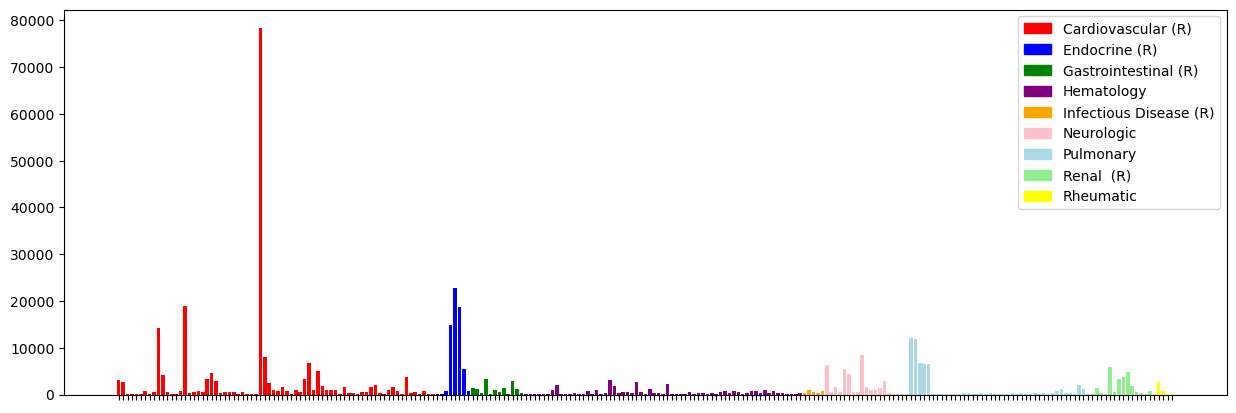

In [23]:
from matplotlib import patches as mpatches
plt.rcParams["figure.figsize"] = (15,5)

paths = list(paths_mult_1['pasthistorypath'])
nostays = list(paths_mult_1['NumberOfStays'])
classes = ['Cardiovascular (R)', 'Endocrine (R)', 'Gastrointestinal (R)', 'Hematology', 'Infectious Disease (R)', 'Neurologic', 'Pulmonary', 'Renal  (R)', 'Rheumatic']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'lightblue', 'lightgreen', 'yellow']

def color(path):
    if 'Cardiovascular (R)' in path:
        return 'red'
    if 'Endocrine (R)' in path:
        return 'blue'
    if 'Gastrointestinal (R)' in path:
        return 'green'
    if 'Hematology' in path:
        return 'purple'
    if 'Infectious Disease (R)' in path:
        return 'orange'
    if 'Neurologic' in path:
        return 'pink'
    if 'Pulmonary' in path:
        return 'lightblue'
    if 'Renal  (R)' in path:
        return 'lightgreen'
    if 'Rheumatic' in path:
        return 'yellow'

bar = plt.bar(paths, nostays, color = [color(path) for path in paths])

handles = [mpatches.Patch(color=color_name) for color_name in colors]
labels = [class_name for class_name in classes]
plt.legend(handles, labels)
plt.xticks(visible=False)
plt.show()

In [24]:
no_cardiovascular_stays = len(df1[df1['pasthistorypath'].str.contains('Cardiovascular')])
no_endocrine_stays = len(df1[df1['pasthistorypath'].str.contains('Endocrine')])
no_gastrointestinal_stays = len(df1[df1['pasthistorypath'].str.contains('Gastrointestinal')])
no_hematology_stays = len(df1[df1['pasthistorypath'].str.contains('Hematology')])
no_infectious_stays = len(df1[df1['pasthistorypath'].str.contains('Infectious')])
no_neurologic_stays = len(df1[df1['pasthistorypath'].str.contains('Neurologic')])
no_pulmonary_stays = len(df1[df1['pasthistorypath'].str.contains('Pulmonary')])
no_renal_stays = len(df1[df1['pasthistorypath'].str.contains('Renal')])
no_rheumatic_stays = len(df1[df1['pasthistorypath'].str.contains('Rheumatic')])


In [25]:
print('Number of annotations for the Cardiovascular system: ', no_cardiovascular_stays)
print('Number of annotations for the Endocrine system: ', no_endocrine_stays)
print('Number of annotations for the Pulmonary system: ', no_pulmonary_stays)
print('Number of annotations for the Neurologic system: ', no_neurologic_stays)
print('Number of annotations for the Gastrointestinal system: ', no_gastrointestinal_stays)
print('Number of annotations for the Hematology system: ', no_hematology_stays)
print('Number of annotations for the Infectious system: ', no_infectious_stays)
print('Number of annotations for the Renal system: ', no_renal_stays)
print('Number of annotations for the Rheumatic system: ', no_rheumatic_stays)

Number of annotations for the Cardiovascular system:  194403
Number of annotations for the Endocrine system:  63371
Number of annotations for the Pulmonary system:  57015
Number of annotations for the Neurologic system:  37123
Number of annotations for the Gastrointestinal system:  13653
Number of annotations for the Hematology system:  29795
Number of annotations for the Infectious system:  2764
Number of annotations for the Renal system:  23285
Number of annotations for the Rheumatic system:  3553
